# Decision Tree

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from DecisionTree import DecisionTree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

data = pd.read_csv('FourClassDS.csv')
print("Ending of Importing...")

Ending of Importing...


## Verification Metrics

In [16]:
def calc_accuracy(y_true, y_pred):
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

def calc_metric(conf_matrix):
    TP = []
    TN = []
    FP = []
    FN = []

    num_classes = conf_matrix.shape[0]

    for i in range(num_classes):
        TP.append(conf_matrix[i, i])
        FN.append(np.sum(conf_matrix[i, :]) - TP[i])
        FP.append(np.sum(conf_matrix[:, i]) - TP[i])
        TN.append(np.sum(conf_matrix) - (FP[i] + FN[i] + TP[i]))
    return TP, TN, FP, FN
    
def calc_precision(TP, FP):
    micro = np.average(TP) / (np.average(TP) + np.average(FP))
    macro = 0
    for i in range(len(TP)):
        macro += TP[i] / (TP[i] + FP[i])
    macro /= len(TP)
    return macro, micro

def calc_recall(TP, FN):
    micro = np.average(TP) / (np.average(TP) + np.average(FN))
    macro = 0
    for i in range(len(TP)):
        macro += TP[i] / (TP[i] + FN[i])
    macro /= len(TP)
    return macro, micro

def calc_f1_score(micro_prec, macro_prec, micro_recall, macro_recall):
    micro = 2 * np.average(micro_prec) * np.average(micro_recall) / (np.average(micro_prec) + np.average(micro_recall))
    macro = 0
    for i in range(len(macro_prec)):
        macro += 2 * macro_prec * macro_recall / (macro_prec + macro_recall)
    macro /= len(macro_prec)
    return macro, micro

## Test Train Data

In [17]:
y = data.iloc[:, -1].values
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1].values)

## Save the StandartScaler

In [18]:
# Pickle the instance
with open('standart_scaler.pkl', 'wb') as output:  # Note 'wb' for write binary
    pickle.dump(scaler, output, pickle.HIGHEST_PROTOCOL)

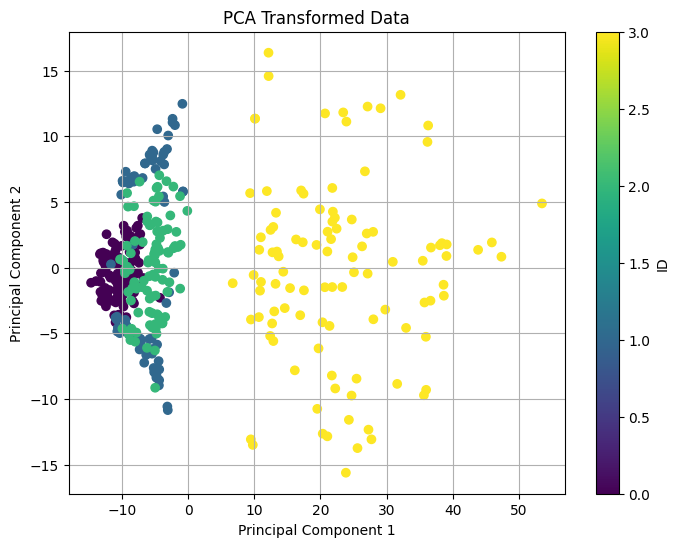

In [19]:
# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=120)
X_pca = pca.fit_transform(X)

# Display the transformed features shape and variance ratio
X_pca_shape = X_pca.shape
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='ID')
plt.grid(True)
plt.show()

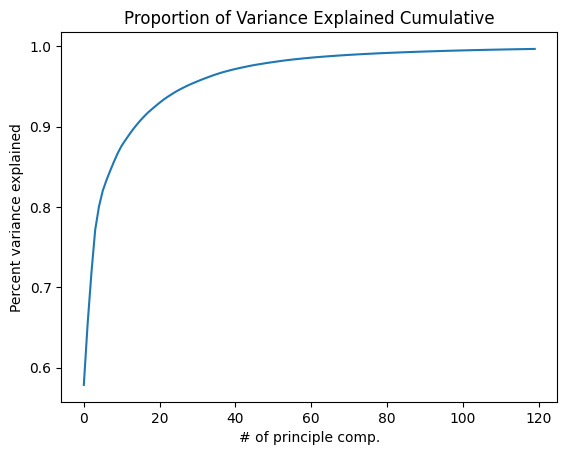

In [20]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues)
plt.title('Proportion of Variance Explained Cumulative')
plt.xlabel('# of principle comp.')
plt.ylabel('Percent variance explained')
plt.show()

In [21]:
X = X_pca

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
y_train = np.reshape(y_train,(x_train.shape[0], 1) )
y_test  = np.reshape(y_test, (x_test.shape[0] , 1) )
data_train = arr = np.hstack((x_train, y_train))
data_test = arr = np.hstack((x_test, y_test))
print(data_train.shape, data_test.shape)

(328, 121) (83, 121)


## Train 

In [23]:
decision_tree = DecisionTree(data_train, 15)
decision_tree.construct()

The tree is constructed


## Training Results

Accuracy:  0.5701219512195121


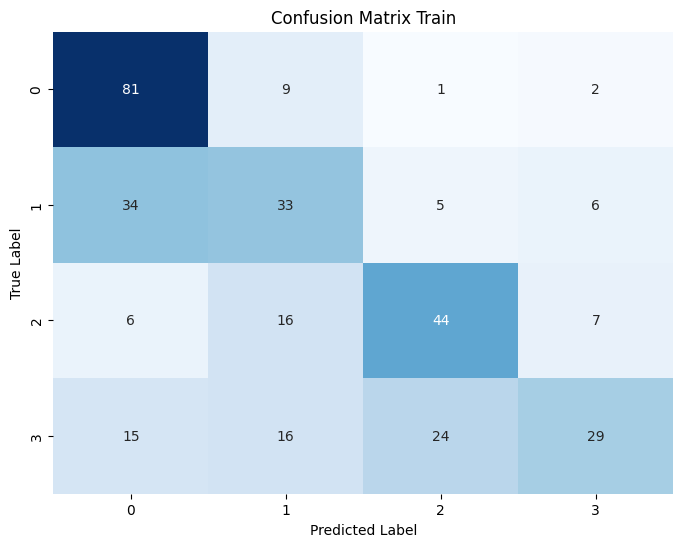

In [24]:
y_pred_train = []
for i in range(data_train.shape[0]):
    y_pred_train.append(decision_tree.predict(data_train[i,:], decision_tree.root_branch))
print("Accuracy: ", calc_accuracy(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
TP, TN, FP, FN = calc_metric(conf_matrix_train)

macro_prec = precision_score(y_train, y_pred_train, average='macro')
micro_prec = precision_score(y_train, y_pred_train, average='micro')

macro_recall = recall_score(y_train, y_pred_train, average='macro')
micro_recall = recall_score(y_train, y_pred_train, average='micro')

macro_f1 = f1_score(y_train, y_pred_train, average='macro')
micro_f1 = f1_score(y_train, y_pred_train, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.5701219512195121  Macro:  0.5738049212313918
Recall | Micro:  0.5701219512195121  Macro:  0.5605056215694748
F1 Score | Micro:  0.5701219512195121  Macro:  0.5483496407210322


## Testing Results

Accuracy:  0.37349397590361444


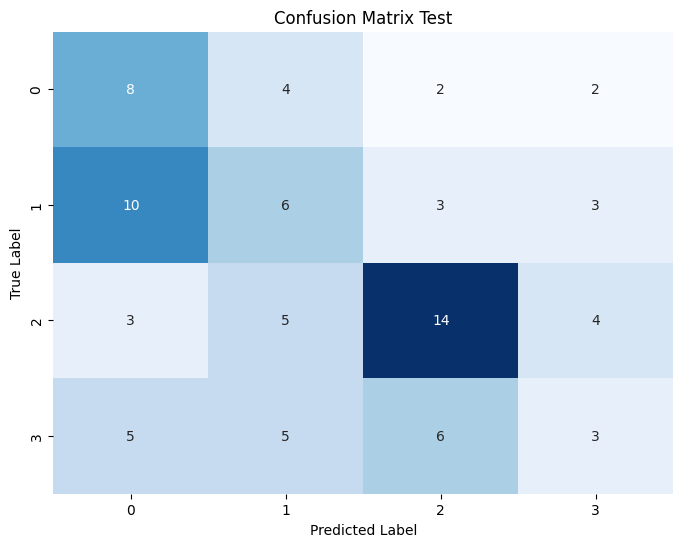

In [26]:
y_pred_test = []
for i in range(data_test.shape[0]):
    y_pred_test.append(decision_tree.predict(data_test[i,:], decision_tree.root_branch))
print("Accuracy: ", calc_accuracy(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Test')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
TP, TN, FP, FN = calc_metric(conf_matrix_test)
macro_prec = precision_score(y_test, y_pred_test, average='macro')
micro_prec = precision_score(y_test, y_pred_test, average='micro')

macro_recall = recall_score(y_test, y_pred_test, average='macro')
micro_recall = recall_score(y_test, y_pred_test, average='micro')

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
micro_f1 = f1_score(y_test, y_pred_test, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.37349397590361444  Macro:  0.35442307692307695
Recall | Micro:  0.37349397590361444  Macro:  0.36727088700772914
F1 Score | Micro:  0.37349397590361444  Macro:  0.35230866540164457


## Save the model

In [28]:
# Pickle the instance
with open('decision_tree.pkl', 'wb') as output:  # Note 'wb' for write binary
    pickle.dump(decision_tree, output, pickle.HIGHEST_PROTOCOL)

## Find Ideal Depth Size

The tree is constructed
For depth =  1  Accuracy =  0.1927710843373494
The tree is constructed
For depth =  2  Accuracy =  0.21686746987951808
The tree is constructed
For depth =  3  Accuracy =  0.27710843373493976
The tree is constructed
For depth =  4  Accuracy =  0.2891566265060241
The tree is constructed
For depth =  5  Accuracy =  0.40963855421686746
The tree is constructed
For depth =  6  Accuracy =  0.39759036144578314
The tree is constructed
For depth =  7  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  8  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  9  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  10  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  11  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  12  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  13  Accuracy =  0.37349397590361444
The tree is constructed
For depth =  14  Accuracy =  0.3734939

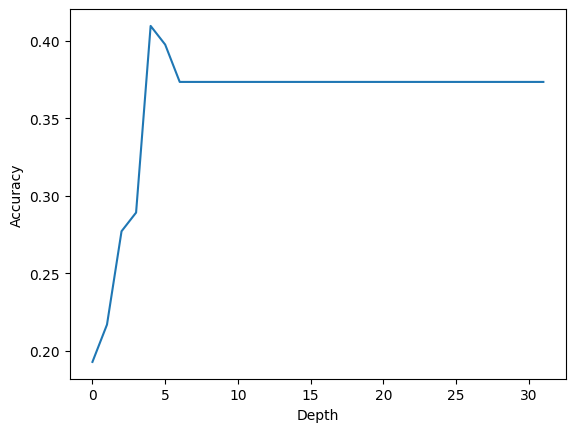

In [29]:
acc = []

for i in range(1, 33):
    decision_tree = DecisionTree(data_train, i)
    decision_tree.construct()

    y_pred_test = []
    for j in range(data_test.shape[0]):
        y_pred_test.append(decision_tree.predict(data_test[j,:], decision_tree.root_branch))
    print("For depth = ", i, " Accuracy = ", calc_accuracy(y_test, y_pred_test))
    acc.append(calc_accuracy(y_test, y_pred_test))

plt.plot(acc)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()